In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [114]:
def gaussian_kernel(xi, xj, sigma):
    return np.exp(-1 * np.linalg.norm(xi-xj)/sigma)

In [115]:
def my_sgd(X, yTarget):
    w0 = np.random.randn(X.shape[1], 1)
    E0 = np.linalg.norm(yTarget - X @ w0)
    print(E0)

    MaxIter = 20000
    lRate = 0.2
    Eplot = np.zeros((MaxIter, 1))

    wIter = w0
    for iter in range(MaxIter):
        j = np.floor(np.random.rand() * X.shape[0]).astype(int)
        xj = np.array([X[j, :]]).T
        yj = yTarget[j, :]
        yPred = xj.T @ wIter
        wIter = wIter - lRate * (yPred[0][0] - yj) * xj
        # print(wIter)
        Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
    y_linear = X @ wIter
    return wIter, Eplot, y_linear

In [116]:
def w_sgd(w, x, y):
    lr = 0.2
    maxIter = 20000
    ex_plot = np.zeros((maxIter, 1))
    ex_plot[0] = np.linalg.norm(x @ w - y)

    for i in range(1, maxIter):
        flag = np.random.randint(low=0, high=x.shape[0]-1)
        x_random = np.array(x[flag])
        y_random_true = y[flag]
        y_random_predict = x_random @ w
        w -= lr*(y_random_predict[0]-y_random_true[0])*np.matrix(x_random).T
        ex_plot[i] = np.linalg.norm(x @ w - y)

    y_rbf = x @ w
    return w, ex_plot, y_rbf


In [117]:
# data preparation
hardware_data = pd.read_table("data/machine.data", encoding='UTF8', header=None, sep=',')

X_data = hardware_data.iloc[:, [2, 3, 4, 5, 6, 7]].values[16:]
X_data = normalize(X_data, axis=0, norm='max')

y_true = hardware_data.iloc[:, [-2]].values[16:]
y_predict = hardware_data.iloc[:, [-1]].values[16:]

print(y_predict.shape)

(193, 1)


In [118]:
# design matrix
J = 20
kmeans, sigma = KMeans(n_clusters=J, random_state=0).fit(X_data), np.std(X_data)
U = np.zeros((X_data.shape[0], J))

for i in range(X_data.shape[0]):
    for j in range(J):
        U[i][j] = gaussian_kernel(X_data[i], kmeans.cluster_centers_[j], np.std(X_data[j]))

In [119]:
# w_pseudo_inverse = np.linalg.inv(U.T @ U) @ U.T @ y_true
w_pseudo_inverse = np.random.randn(J, 1)
# print("w_random:\n", w_pseudo_inverse)


# estimate w
print(w_pseudo_inverse.shape)
print(X_data.shape)
print(y_true.shape)
w, e_plot, y_rbf = w_sgd(w_pseudo_inverse, U, y_true)
print("rbf error:", e_plot[-1])

w_linear, e_plot_linear, y_linear = my_sgd(X_data, y_true)
print("linear regression error:", e_plot_linear[-1])

w_random:
 [[ 0.81198402]
 [-0.37581467]
 [ 0.211098  ]
 [-0.24750754]
 [ 0.20089847]
 [ 0.53038493]
 [ 0.67867392]
 [-0.71033432]
 [ 0.50430008]
 [ 0.26438881]
 [-0.72905283]
 [-1.04898529]
 [-0.04578821]
 [ 1.04706498]
 [ 1.02961632]
 [ 1.22588827]
 [ 0.78465063]
 [ 0.71641329]
 [-1.04297271]
 [-0.5542312 ]]
(20, 1)
(193, 6)
(193, 1)
rbf error: [716.94723757]
2299.298166644846
linear regression error: [913.6077193]


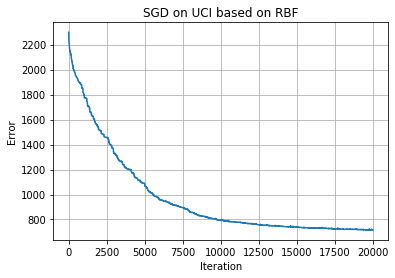

In [120]:
# plot
fig, ax = plt.subplots()
ax.plot(e_plot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("SGD on UCI based on RBF")
plt.show()


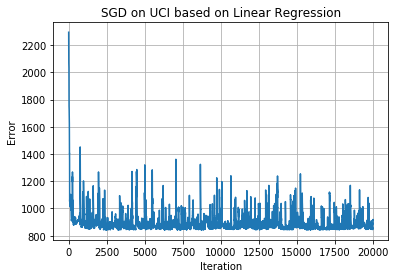

In [121]:
fig1, ax1 = plt.subplots()
ax1.plot(e_plot_linear)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Error")
ax1.grid(True)
ax1.set_title("SGD on UCI based on Linear Regression")
plt.show()

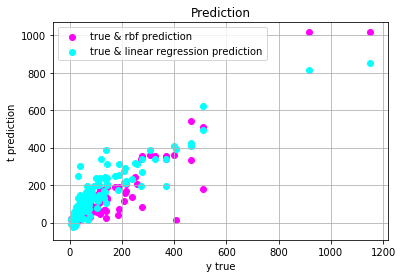

In [122]:
fig2, ax2 = plt.subplots()
ax2.scatter(y_true, y_rbf,  Color='magenta', label='true & rbf prediction')
ax2.scatter(y_true, y_linear,  Color='cyan', label='true & linear regression prediction')
# ax2.scatter(y_true, y_rbf)
ax2.set_xlabel("y true")
ax2.set_ylabel("t prediction")
ax2.grid(True)
ax2.set_title("Prediction")
plt.legend()
plt.show()